In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [49]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [50]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

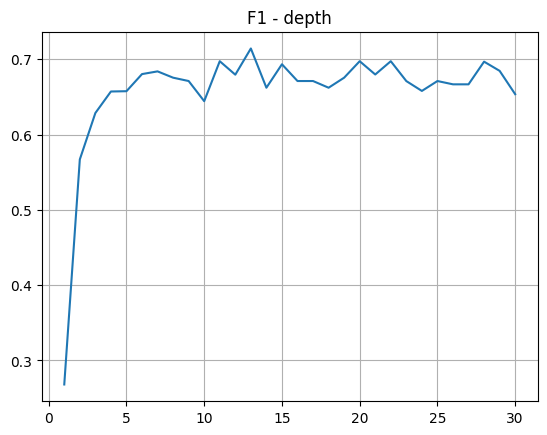

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

depths = list(range(1, 31))
accuracies = []

for d in depths:
    clf = RandomForestClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracies.append(f1_score(y_test, y_pred))

plt.plot(depths, accuracies)
plt.title("F1 - depth")
plt.grid()

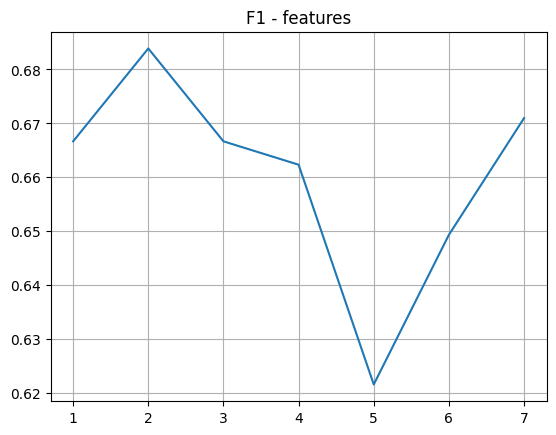

In [52]:
features = list(range(1, X.shape[1]))
scores = []

for f in features:
    clf = RandomForestClassifier(max_features=f)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))


plt.plot(features, scores)
plt.title("F1 - features")
plt.grid(True)

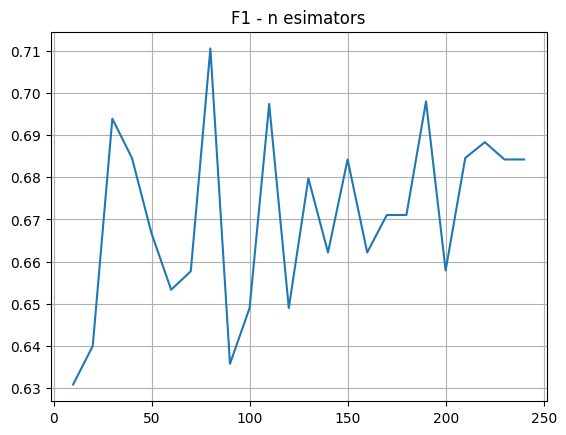

In [53]:
trees = list(range(10, 250, 10))
f1_scores = []
times = []

for tree in trees:
    start = time.time()
    clf = RandomForestClassifier(n_estimators=tree)
    times.append(time.time() - start)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))
    

plt.plot(trees, f1_scores)
plt.title("F1 - n esimators")
plt.grid(True)

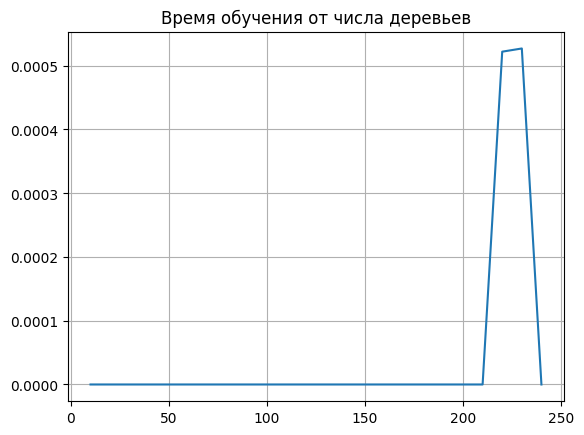

In [54]:
plt.plot(trees, times)
plt.title("Время обучения от числа деревьев")
plt.grid(True)
plt.show()

In [55]:
from xgboost import XGBClassifier
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
start_time = time.time()
bst.fit(X_train, y_train)
time_for_fit = time.time() - start_time
preds = bst.predict(X_test)
print("F1:", f1_score(y_test, preds))
print("Время обучения:", time_for_fit)

F1: 0.6625
Время обучения: 0.006496906280517578
